In [1]:
import sys
sys.path.append('/u/ajagadish/ermi/decisionmaking/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
from mycolorpy import colorlist as mcp
import math
FONTSIZE=20
SYS_PATH = '/u/ajagadish/ermi' #'/raven/u/ajagadish/vanilla-llama/'
PARADIGM_PATH = f"{SYS_PATH}/decisionmaking"
from plots import plot_decisionmaking_data_statistics, model_comparison_binz2022, model_simulation_binz2022, model_ginis_binz2022
from utils import save_real_data_openML, save_real_data_lichtenberg2017, induce_pseudo_condition_llm_generated_data


/u/ajagadish/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
def plot_frequency_tasklabels(file_name, path='/u/ajagadish/ermi/functionlearning/data/tasklabels', feature_names=True, pairs=True, top_labels=50):

    df = pd.read_csv(f'{path}/{file_name}.csv')
    df.feature_names = df['feature_names'].apply(lambda x: eval(x))
    df.target_names = df['target_names']#.apply(lambda x: eval([x]))
    
    def to_lower(ff):
        return [x.lower() for x in ff]
    
    df.feature_names = df['feature_names'].apply(lambda x: to_lower(x))
    df.target_names = df['target_names'].apply(lambda x: [x.lower()])
    
    # name of the column containing the feature names
    column_name = 'feature_names' if feature_names else 'target_names'
    # count of number of times a type of features occurs
    list_counts = Counter([tuple(features) for features in df[column_name]] if pairs else np.stack(df[column_name].values).reshape(-1))

    # sort the Counter by counts in descending order
    sorted_list_counts = sorted(list_counts.items(), key=lambda x: x[1], reverse=True)

    # extract the counts and names for the top 50 labels
    task_labels = np.array([task_label[0] for task_label in sorted_list_counts[:top_labels]])
    label_counts= np.array([task_label[1] for task_label in sorted_list_counts[:top_labels]])
    label_names = ['-'.join(task_labels[idx]) for idx in range(len(task_labels))] if pairs else task_labels

    # plot the bars of labels and counts
    f, ax = plt.subplots(1, 1, figsize=(20,20))
    ax.bar(label_names, label_counts)
    plt.xticks(label_names, label_names, rotation=90, fontsize=FONTSIZE-6.5)
    plt.yticks(fontsize=FONTSIZE-6)
    ax.set_xlabel('Feature Names' if feature_names else 'Target Names', fontsize=FONTSIZE)
    ax.set_ylabel('Counts', fontsize=FONTSIZE)
    ax.set_title(f'Top {top_labels} Tasks', fontsize=FONTSIZE)
    sns.despine()
    f.tight_layout()
    plt.show()
    
    f.savefig(f'{SYS_PATH}/figures/decisionmaking_frequency_plot_tasklabels_dim4_direction_{column_name}_paired={pairs}_top{top_labels}.png', bbox_inches='tight', dpi=300)


In [4]:
def gini_compute(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    return 0.5 * rmad

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages

Ranking histogram bin edges: [-0.5, 0.5, 1.5, 2.5]
Ranking histogram bin values: [0.5175879396984925, 0.135678391959799, 0.18090452261306533, 0.1658291457286432]
Direction histogram bin edges: [-1.5, -0.5, 0.5]
Direction histogram bin values: [0.2543969849246231, 0.000628140703517588, 0.7449748743718593]


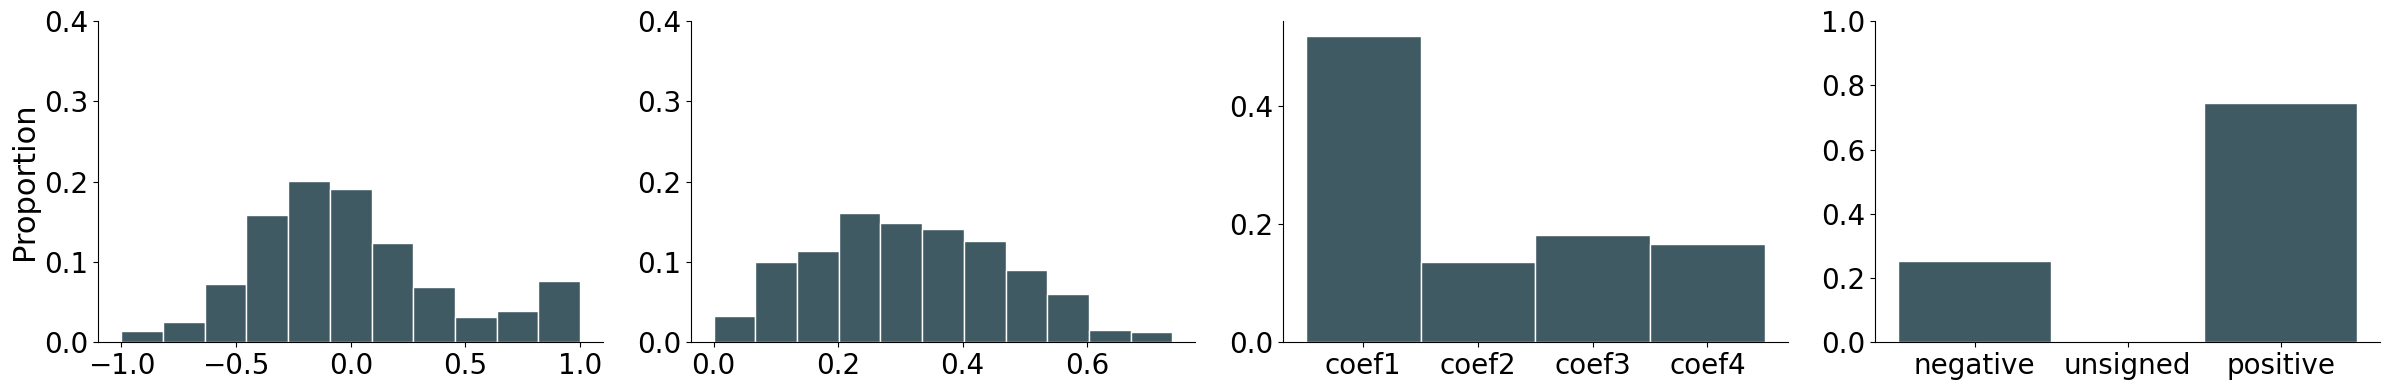

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages

Ranking histogram bin edges: [-0.5, 0.5, 1.5, 2.5]
Ranking histogram bin values: [0.3442211055276382, 0.1708542713567839, 0.19597989949748743, 0.2889447236180904]
Direction histogram bin edges: [-1.5, -0.5, 0.5]
Direction histogram bin values: [0.07537688442211055, 0.0, 0.9246231155778895]


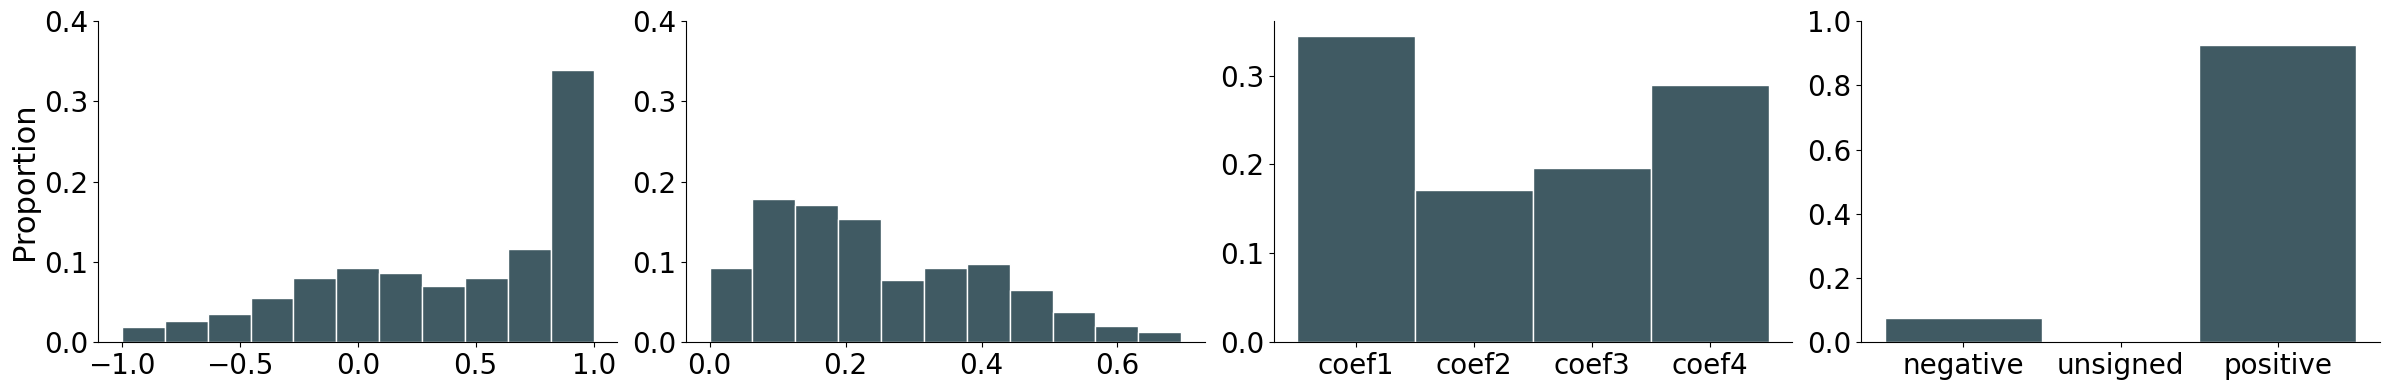

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages

Ranking histogram bin edges: [-0.5, 0.5, 1.5, 2.5]
Ranking histogram bin values: [0.4375, 0.165, 0.1925, 0.205]
Direction histogram bin edges: [-1.5, -0.5, 0.5]
Direction histogram bin values: [0.21, 0.0, 0.79]


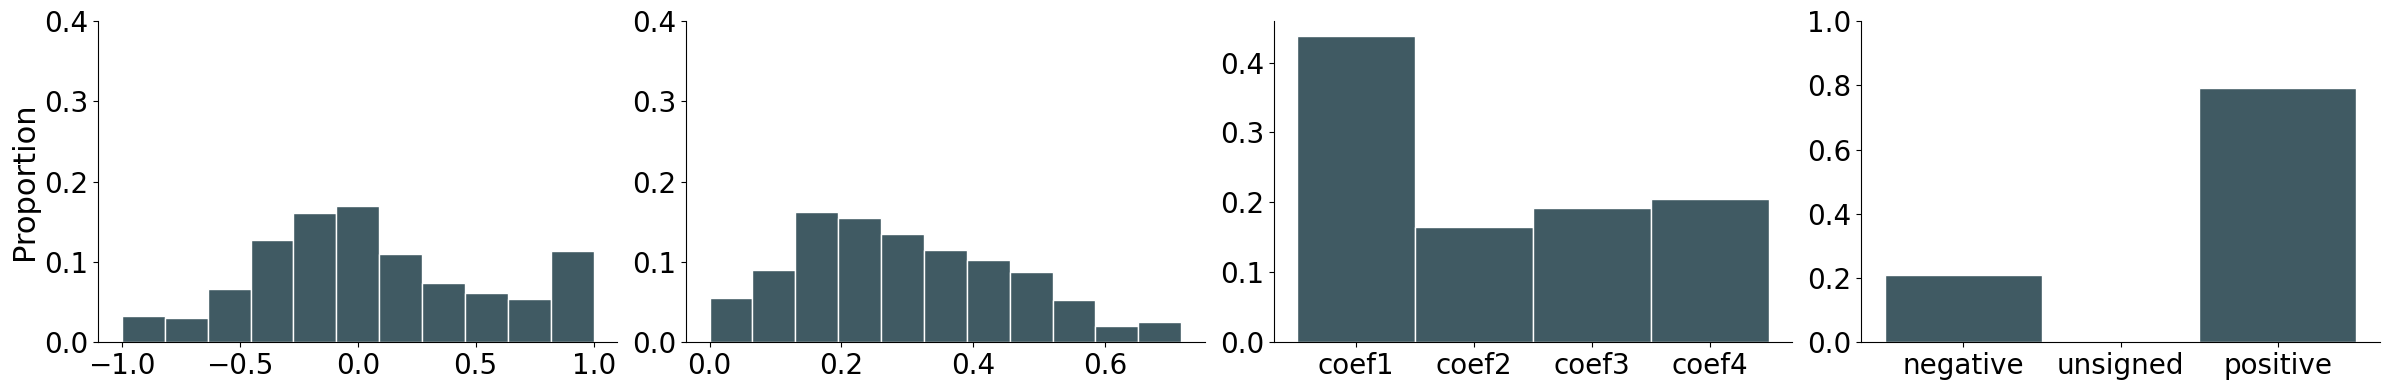

In [2]:
# # plot data statistics for 2D data
# plot_decisionmaking_data_statistics(0, dim=2, condition='unknown')
# plot_decisionmaking_data_statistics(2, dim=2, condition='real')
# plot_decisionmaking_data_statistics(1, dim=2, condition='synthetic')

# plot data statistics for 4D data
plot_decisionmaking_data_statistics(0, dim=4, condition='ranked')  #llm
plot_decisionmaking_data_statistics(0, dim=4, condition='direction')  #llm
plot_decisionmaking_data_statistics(0, dim=4, condition='unknown')   #llm
# plot_decisionmaking_data_statistics(1, dim=4, condition='ranked') #synthetic
# plot_decisionmaking_data_statistics(1, dim=4, condition='direction')   #synthetic
# plot_decisionmaking_data_statistics(2, dim=4, condition='openML', method='random')
# plot_decisionmaking_data_statistics(2, dim=4, condition='lichtenberg2017', method='random')

# model simulations
# model_simulation_binz2022(experiment_id=1, source='claude', condition='ranked')
# model_simulation_binz2022(experiment_id=2, source='claude', condition='direction')
# model_simulation_binz2022(experiment_id=3, source='claude', condition='unknown')
# # model_simulation_binz2022(experiment_id=1, source='claude', condition='pseudoranked')
# # model_simulation_binz2022(experiment_id=2, source='claude', condition='pseudodirection')
# model_simulation_binz2022(experiment_id=1, source='synthetic', condition='ranked')
# model_simulation_binz2022(experiment_id=2, source='synthetic', condition='direction')

# model ginis
# model_ginis_binz2022(pseudo=True)
# model_ginis_binz2022()

# model comparison
# model_comparison_binz2022(experiment_id=1)
# model_comparison_binz2022(experiment_id=2)
# model_comparison_binz2022(experiment_id=1, pseudo=True)
# model_comparison_binz2022(experiment_id=2, pseudo=True)
# model_comparison_binz2022(experiment_id=3)
# model_comparison_binz2022(experiment_id=4)
